In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [ ]:
df=pd.read_csv('/content/winequality-red.csv')
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [ ]:
df.shape

(1599, 12)

In [ ]:
df.isnull().any()

fixed acidity           False
volatile acidity        False
citric acid             False
residual sugar          False
chlorides               False
free sulfur dioxide     False
total sulfur dioxide    False
density                 False
pH                      False
sulphates               False
alcohol                 False
quality                 False
dtype: bool

In [ ]:
df.quality.value_counts()

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

<ipython-input-6-cc0e16fd78a8>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df.alcohol)


<Axes: xlabel='alcohol', ylabel='Density'>

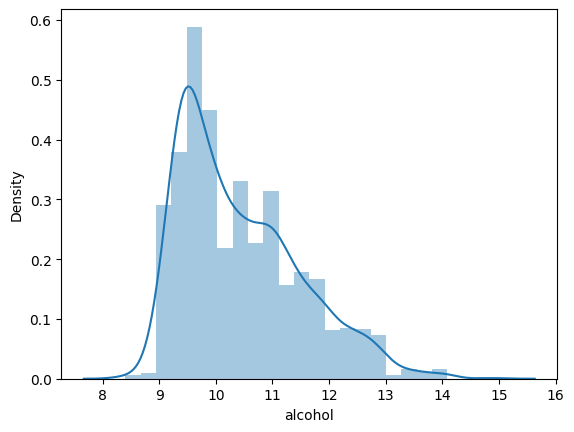

In [ ]:
sns.distplot(df.alcohol)

<Axes: ylabel='quality'>

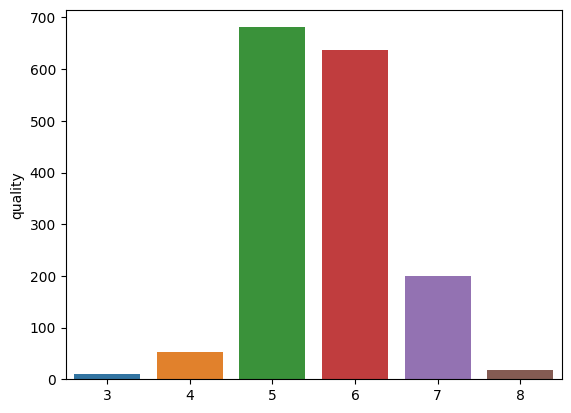

In [ ]:
sns.barplot(x =df.quality.value_counts().index,y =df.quality.value_counts() )

<Axes: xlabel='alcohol', ylabel='quality'>

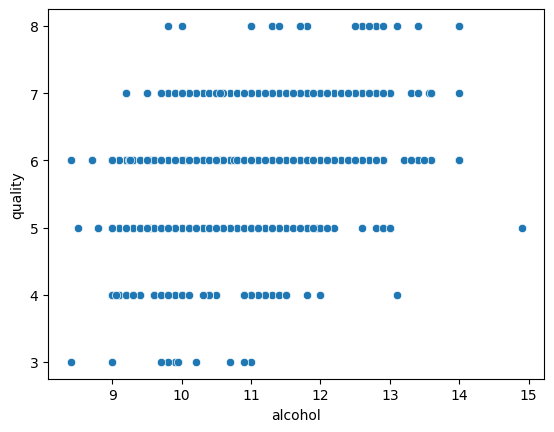

In [ ]:
sns.scatterplot(x = df.alcohol,y=df.quality)

<Axes: >

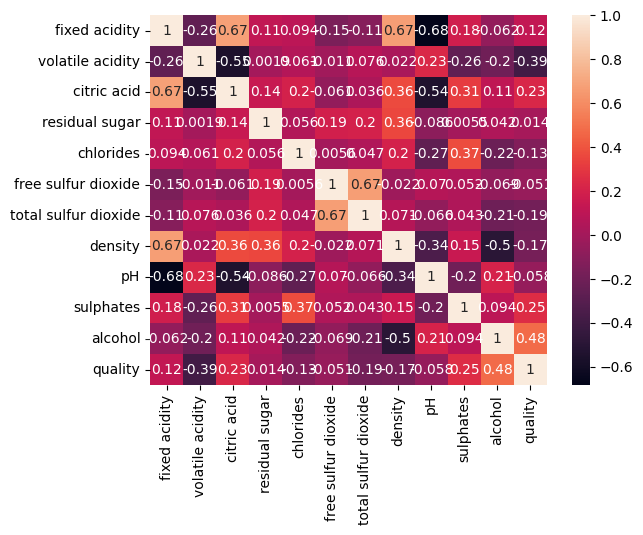

In [ ]:
sns.heatmap(df.corr(),annot=True)

In [ ]:
df.median()

fixed acidity            7.90000
volatile acidity         0.52000
citric acid              0.26000
residual sugar           2.20000
chlorides                0.07900
free sulfur dioxide     14.00000
total sulfur dioxide    38.00000
density                  0.99675
pH                       3.31000
sulphates                0.62000
alcohol                 10.20000
quality                  6.00000
dtype: float64

<Axes: >

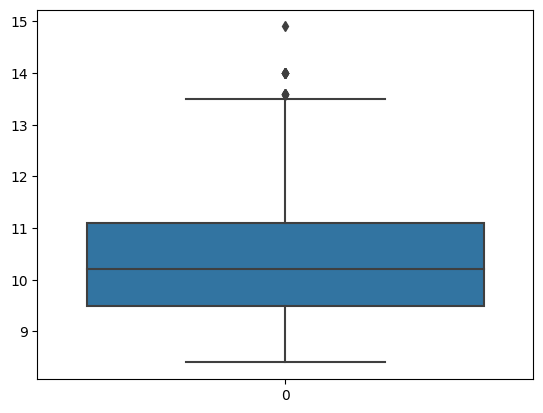

In [ ]:
sns.boxplot(df.alcohol)

In [ ]:
q3=df.alcohol.quantile(0.75)
q1=df.alcohol.quantile(0.25)
IRQ=q3-q1
IRQ

1.5999999999999996

In [ ]:
upperlimit=q3+1.5*IRQ
lowerlimit=q1-1.5*IRQ

In [ ]:
df = df[df.alcohol<upperlimit]

<Axes: >

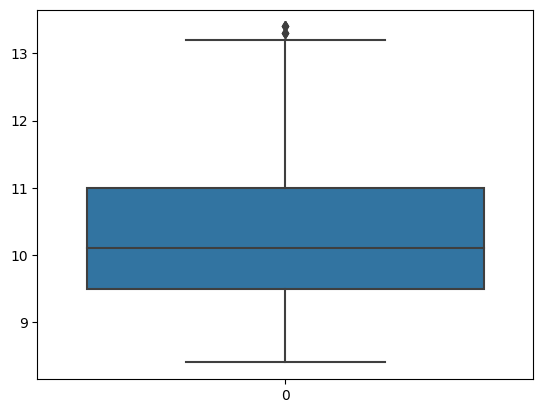

In [ ]:
sns.boxplot(df.alcohol)

In [ ]:
p99 = df.alcohol.quantile(0.99)

In [ ]:
df = df[df.alcohol<=p99]

<Axes: >

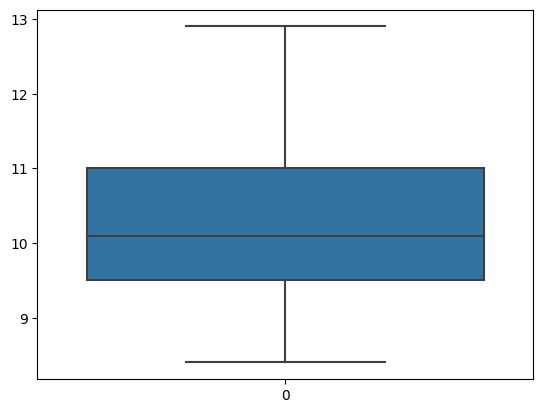

In [ ]:
sns.boxplot(df.alcohol)

<Axes: >

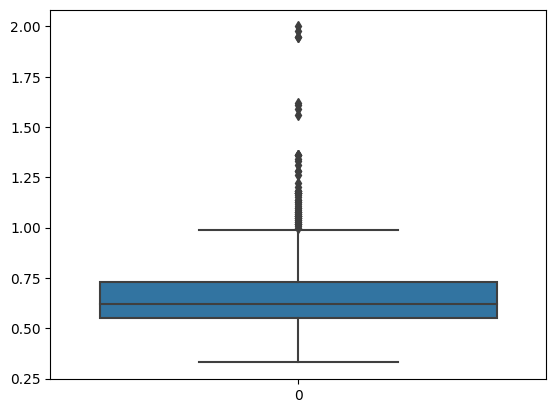

In [ ]:
sns.boxplot(df.sulphates)

In [ ]:
q3=df.sulphates.quantile(0.75)
q1=df.sulphates.quantile(0.25)

In [ ]:
IRQ=q3-q1
IRQ

0.17999999999999994

In [ ]:
upperlimit=q3+1.25*IRQ
lowerlimit=q1-1.5*IRQ

In [ ]:
df = df[df.sulphates<upperlimit]

<Axes: >

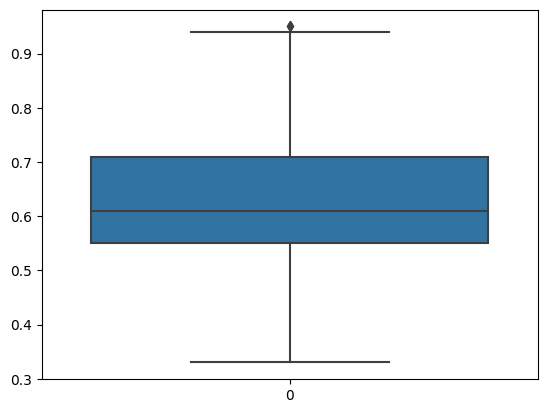

In [ ]:
sns.boxplot(df.sulphates)

In [ ]:
q99=df.sulphates.quantile(0.99)

In [ ]:
df=df[df.sulphates<=q99]

<Axes: >

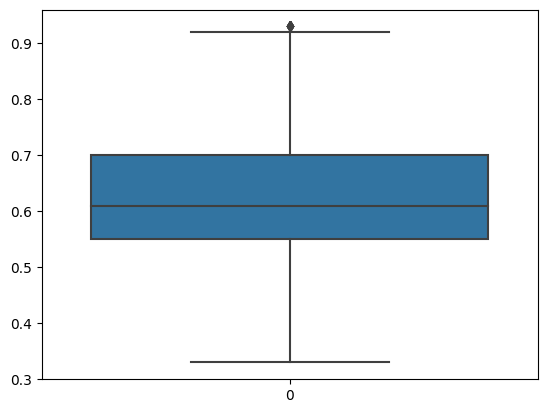

In [ ]:
sns.boxplot(df.sulphates)

In [ ]:
df.shape

(1492, 12)

<Axes: >

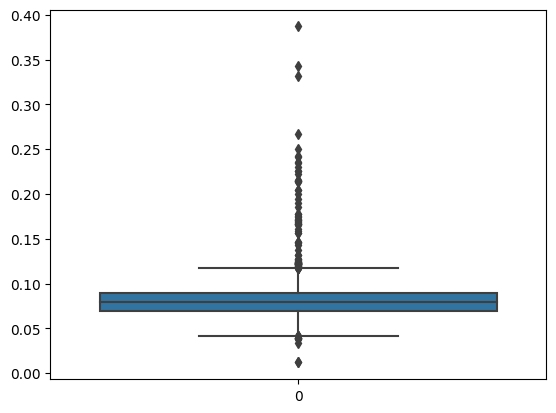

In [ ]:
sns.boxplot(df.chlorides)

In [ ]:
q3=df.chlorides.quantile(0.75)
q1=df.chlorides.quantile(0.25)

In [ ]:
IRQ=q3-q1

In [ ]:
upperlimit=q3+1.5*IRQ
lowerlimit=q1-1.5*IRQ

In [ ]:
df = df[df.chlorides<upperlimit]

In [ ]:
df=df[df.chlorides>lowerlimit]

<Axes: >

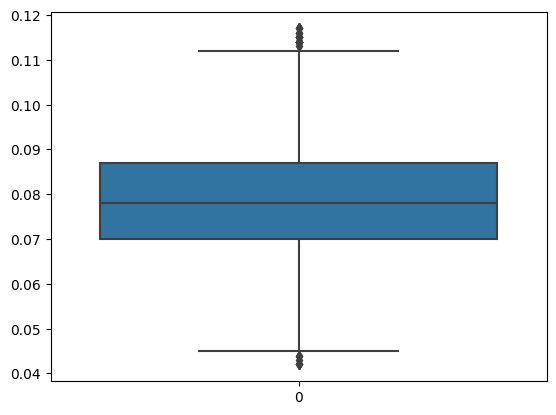

In [ ]:
sns.boxplot(df.chlorides)

In [ ]:
df.shape

(1396, 12)

In [ ]:
p99 = df.chlorides.quantile(0.99)

In [ ]:
df = df[df.chlorides<=p99]

<Axes: >

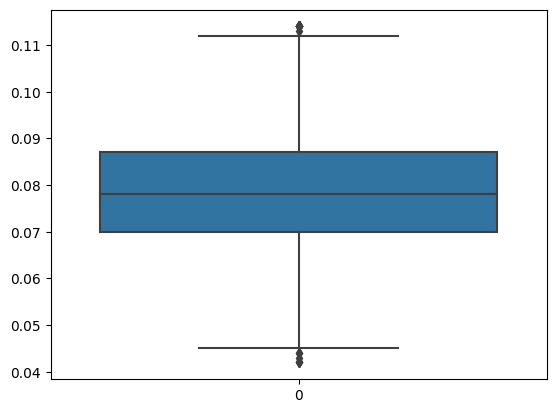

In [ ]:
sns.boxplot(df.chlorides)

In [ ]:
df.shape

(1386, 12)

In [ ]:
y = df['quality']
y

0       5
1       5
2       5
3       6
4       5
       ..
1594    5
1595    6
1596    6
1597    5
1598    6
Name: quality, Length: 1386, dtype: int64

In [ ]:
X =df.drop(columns =['quality'],axis =1)
X.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4


In [ ]:
scale =MinMaxScaler()

In [ ]:
X_scaled= pd.DataFrame(scale.fit_transform(X),columns =X.columns)
X_scaled.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,0.247706,0.479339,0.000000,0.068493,0.472222,0.140845,0.098940,0.588728,0.656566,0.383333,0.222222
1,0.284404,0.628099,0.000000,0.116438,0.777778,0.338028,0.215548,0.512567,0.343434,0.583333,0.311111
2,0.284404,0.528926,0.051282,0.095890,0.694444,0.197183,0.169611,0.527799,0.404040,0.533333,0.311111
3,0.596330,0.132231,0.717949,0.068493,0.458333,0.225352,0.190813,0.603960,0.303030,0.416667,0.311111
4,0.247706,0.479339,0.000000,0.068493,0.472222,0.140845,0.098940,0.588728,0.656566,0.383333,0.222222


In [ ]:
x_train,x_test,y_train,y_test = train_test_split(X_scaled,y,test_size=0.2,random_state=46,shuffle=True)

**LINEAR REGRESSION**

In [ ]:
lr=LinearRegression()

In [ ]:
lr.fit(x_train,y_train)

LinearRegression()

In [ ]:
y_predict =lr.predict(x_test)
y_predict

array([5.00310556, 5.97837613, 5.33235715, 5.03253408, 5.84030005,
       4.78858811, 5.40227899, 5.64514891, 5.62226584, 5.32749267,
       5.69537906, 6.40198509, 5.372092  , 5.628978  , 5.81358306,
       6.31830095, 5.32467422, 5.1347734 , 5.75863996, 5.74234792,
       5.34284751, 6.49948034, 5.11063514, 4.92089175, 6.57795868,
       4.99131601, 5.82688736, 5.56550122, 5.31144685, 5.15160127,
       5.43650082, 6.18235989, 5.17201457, 6.03377796, 5.7305838 ,
       5.32683105, 5.46879046, 4.9556798 , 6.81819005, 5.39992076,
       5.28041703, 5.61702772, 6.4641629 , 5.93370829, 5.07461902,
       5.39862281, 6.10764711, 5.22652907, 5.32359106, 6.20127624,
       6.18707074, 5.66428016, 4.98024373, 5.11894389, 5.64996098,
       5.33296689, 5.27087262, 5.43342334, 5.97597943, 5.40544933,
       5.46986215, 5.5236162 , 4.62222946, 5.66428016, 6.35426006,
       5.48269651, 5.22740587, 6.12647607, 6.15378587, 5.14713892,
       4.88702623, 4.87578085, 6.26957593, 5.43751347, 6.58245

In [ ]:
quality = pd.DataFrame({'Actual quality':y_test,'Predicted quality':y_predict})
quality

,Actual quality,Predicted quality
207,5,5.003106
294,6,5.978376
1226,5,5.332357
41,4,5.032534
1078,5,5.840300
...,...,...
690,3,4.807497
55,5,5.177213
346,7,6.320935
103,5,5.015515


In [ ]:
print(metrics.r2_score(y_test,y_predict))

0.36791599473094905
